# Session 6

This session is all about recap and application. We will not (or hardly) cover new concepts but instead apply the things we learned in the previous sessions. For this, we will use a dataset on Netflix movies. Again, this data is taken from kaggle. If you would like to know more about the data and the associated challenge, you can take a look here: https://www.kaggle.com/shivamb/netflix-shows

In [43]:
# let's load the usual modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# let's load the data (again, you will have to adjust the path)
df_netflix = pd.read_csv('../python_basics_johanna/data/netflix_titles.csv')

In [45]:
# let's take a look at the first 10 rows
df_netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


Let's take a look at the columns: https://www.kaggle.com/shivamb/netflix-shows

In [46]:
# let's take a look at the columns
df_netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [47]:
print(df_netflix.describe())
df_netflix.dtypes

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

1. How many unique directors are in the dataset?

In a first step, we convert the variable 'directors' from type 'object' to type 'string'. This allows us to modify this variable, in particular to split two directors in one row.

In [48]:
# turn 'directors' from object to string
df_netflix['director'] = df_netflix['director'].astype(str)

In [49]:
df_netflix['director'].head(10)

0                  Kirsten Johnson
1                              nan
2                  Julien Leclercq
3                              nan
4                              nan
5                    Mike Flanagan
6    Robert Cullen, José Luis Ucha
7                     Haile Gerima
8                  Andy Devonshire
9                   Theodore Melfi
Name: director, dtype: object

In [50]:
# We are only interested in the subset of the observations with known directors - remove 'nan' values
df_netflix = df_netflix.loc[df_netflix['director'] != 'nan']

There are sometimes two or more directors to a movie: We need to make sure that our code recognizes the ',' as indicating a split between names

In [51]:
df_netflix['director'] = df_netflix['director'].apply(lambda x: x.split(', '))

In [52]:
print(df_netflix['director'])

0                     [Kirsten Johnson]
2                     [Julien Leclercq]
5                       [Mike Flanagan]
6       [Robert Cullen, José Luis Ucha]
7                        [Haile Gerima]
                     ...               
8801                  [Majid Al Ansari]
8802                    [David Fincher]
8804                  [Ruben Fleischer]
8805                     [Peter Hewitt]
8806                      [Mozez Singh]
Name: director, Length: 6173, dtype: object


We frist 'explode' the dataframe, i.e., each director-film pair gets a separate row.

In [53]:
df_netflix_explode_directors = df_netflix.explode('director')
df_netflix_explode_directors.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


'Robert Cullen' and 'Jose Luis Ucha' now appear with the same film in two distinct rows. We can now compute the distinct values of the column 'director':

In [54]:
set(df_netflix_explode_directors['director'])

{'Luis A. Scalella',
 'Liz Plonka',
 'John Lee Hancock',
 'Fred Cavayé',
 'Cooper Karl',
 'Howard Zieff',
 'Henrik Ruben Genz',
 'Kedar Shinde',
 'Jason Stone',
 'Roly Santos',
 'Chris Weitz',
 'Anurin Nwunembom',
 'Philipp Eichholtz',
 'Jay Bulger',
 'Jamie Babbit',
 'Tim Rouhana',
 'Carlos Morett',
 'Manjeet Maan',
 'Kirk De Micco',
 'Sam Upton',
 'Dharmesh Darshan',
 'Victor Dal Chele',
 'Kobun Shizuno',
 'Shakti Samanta',
 'Sergio Goyri Jr.',
 'Santosh Sivan',
 'Nuhash Humayun',
 'Alex Brewer',
 'Raj Kaushal',
 'John Sturges',
 'David Chuang',
 'Huw Cordey',
 'Roy Campanella II',
 'Hasraf Dulull',
 'Reijer Zwaan',
 'Josh Mendoza',
 'Rajat Kapoor',
 'Mikhil Musale',
 'Roland Emmerich',
 'Miguel Conde',
 'Jehane Noujaim',
 'Tom Stern',
 'Vijay Kumar',
 'Karan Lalit Butani',
 'Shan Hua',
 'Rebecca Harrell Tickell',
 'Fisher Stevens',
 'Chris Bouchard',
 'Vijay Jayapal',
 'Tatiana Villela',
 'Jonathan Liebesman',
 'Fabio Grassadonia',
 'Alejandro De Grazia',
 'Chang-Min Lee',
 'Will Lo

In [55]:
print('Number of unique directors: ', str(len(set(df_netflix_explode_directors['director']))))

Number of unique directors:  4993


2. How many directors are there with the name 'Epstein'? - There are several ways to do this.

In [56]:
# option 1: filter dataframe
df_epstein = df_netflix_explode_directors.loc[df_netflix_explode_directors['director'].str.contains('Epstein')]

In [57]:
len(df_epstein)

3

In [58]:
# option 2: for-loop and if condition

In [59]:
for i in list(set_directors):
    print(i)

Luis A. Scalella
Liz Plonka
John Lee Hancock
Fred Cavayé
Cooper Karl
Howard Zieff
Henrik Ruben Genz
Kedar Shinde
Jason Stone
Roly Santos
Chris Weitz
Anurin Nwunembom
Philipp Eichholtz
Jay Bulger
Jamie Babbit
Tim Rouhana
Carlos Morett
Manjeet Maan
Kirk De Micco
Sam Upton
Dharmesh Darshan
Victor Dal Chele
Kobun Shizuno
Shakti Samanta
Sergio Goyri Jr.
Santosh Sivan
Nuhash Humayun
Alex Brewer
Raj Kaushal
John Sturges
David Chuang
Huw Cordey
Roy Campanella II
Hasraf Dulull
Reijer Zwaan
Josh Mendoza
Rajat Kapoor
Mikhil Musale
Roland Emmerich
Miguel Conde
Jehane Noujaim
Tom Stern
Vijay Kumar
Karan Lalit Butani
Shan Hua
Rebecca Harrell Tickell
Fisher Stevens
Chris Bouchard
Vijay Jayapal
Tatiana Villela
Jonathan Liebesman
Fabio Grassadonia
Alejandro De Grazia
Chang-Min Lee
Will Lockhart
Rudge Campos
Yasuhiro Irie
Jon Freeman
Robert Kouba
Leslie Iwerks
Cecilia Peck
Takashi Yamazaki
Sundar C.
Rich Schlansker
Francine Parker
Axelle Laffont
Roy Boulting
Rahat Kazmi
Anthony Bell
Lin Guan-fu
Ian Edel

Munish Bhardwaj
Christian E. Christiansen
Frédéric Tonolli
Marina Willer
Michael Feifer
John Asher
Bill Guttentag
Troy Byer
David Dhawan
M.J. Isakson
David Batra
Arne Birkenstock
Avinash Walzade
Jean-François Blais
Rod Cabatana Marmol
Steve Ball
Sang-ho Yeon
Alessandro Pepe
Geoff Anderson
Zhao Ji
Ben Falcone
J. Michael Long
Anees Bazmee
John Smithson
Brett Harvey
David Gelb
Thomas Carter
Kery James
Dan Forrer
Mana Yasuda
Asif Kapadia
Fahad Mustafa
Mike Birbiglia
Hallvard Bræin
Jennifer Brea
Sameer Sharma
Andibachtiar Yusuf
Michael Pressman
Gordon Anderson
Charles A. Nichols
Tsutomu Mizushima
Tudor Giurgiu
Raj Nidimoru
Jaivi Dhanda
Ryan Koo
Nibal Arakji
Quinn Lasher
Shivam Nair
Carlos Sorín
Aaron Moorhead
Alejandro Martinez-Beltran
Allen Coulter
Amy Rice
Femi Oyeniran
Philip G. Atwell
Robert Altman
Cody Cameron
Troy Nixey
David Koepp
Bumpy
Bill Oliver
Phil Joanou
Justin Krook
Damani Baker
Dhanush
Francis Whately
Yu Yang
Ruchi Narain
Marcel Barrena
Gabriel Cruz Rivas
Jamie M. Dagg
Kim Ta

Law Wing-cheong
Gerard Barrett
Shashanka Ghosh
Smriti Keshari
Rob Epstein
Irek Dobrowolski
Pavel Kostomarov
Yasir Al Yasiri
Sameer Patil
Mohamed Mostafa
Fabien Beziat
Simranjit Singh Hundal
Vicky Matthews
Uraaz Bahl
Royale Watkins
Gabriel Sabloff
Gary Andrews
Katleho Ramaphakela
Asit Mohapatra
Dennis Rovira van Boekholt
John Upchurch
Ben Steele
George Jackson
Peter Sollett
Michel Gondry
Ulises Valencia
Robert McCallum
Nguyen Thanh Tung
Rodney Rothman
Clint Eastwood
Jenny Gage
Andres Clariond
Augusto Matte
Juan José Campanella
Zhang Yimou
Theo Davies
Kornél Mundruczó
Lee Yoon-jung
B. Subhash
Ben Pluimer
Lester Hsi
Michael Mayer
Kamal Sahani
Peter Spirer
Kelly Reichardt
Curro Velázquez
Johnny Breedt
Miranda de Pencier
Matias Mariani
Beyoncé Knowles-Carter
Andrew Nackman
Michael Cuesta
Alejandro Doria
Ruel S. Bayani
Jacques Perrin
Gary Shore
Shweta Basu Prasad
Duncan McMath
Scott Moore
Joseph Ruben
Rahul Dholakia
Matt Angel
Mike Hodges
Marc Abraham
Thierry Donard
Tom Barton-Humphreys
Arte

Jeff Orlowski
Nana Ekvtimishvili
Sooraj R. Barjatya
Akshay Sanjeev Chavan
Chiwetel Ejiofor
Jenna Laurenzo
Kookie V. Gulati
Benjamin Arfmann
Paul Munger
Kemi Adetiba
Emanuel Hoss-Desmarais
Ben Palmer
Abhishek Varman
Ifeanyi Ikpoenyi
Jerrold Tarog
Saurabh Kabra
Gerhard Mostert
Hayato Date
Arjun Gourisaria
Michael Harte
Sunkanmi Adebayo
Abhijit Kokate
Bruce McCulloch
Jeremy Seifert
Amol Palekar
Danny Cannon
Sam Dunn
Arvind Swamy
Lana Wachowski
Ashu Trikha
Alain Brunard
Yoshiyuki Okada
James Brown
Jordan Ross
Kim Dong-kyu
Selvamani Selvaraj
Marc Francis
Alexandre Heboyan
Nagesh Kukunoor
Daniel Raim
Visute Poolvoralaks
Ryan Polito
Tony Stone
Peyton Reed
Madonne Ashwin
George Cukor
Zachary Heinzerling
Doug Lefler
Ganesh Kadam
Esteban Vidal
Nathan Wiley
Maclain Way
Taketoshi Sado
Jorge M. Fontana
Rajiv Chilaka
Barry Avrich
David Silberg
Andrew Fleming
Ethan Hawke
Daniel Sánchez Arévalo
Pawan K Shrivastava
Richard Rich
Shadab Khan
Joe Dante
Marcos Carnevale
Joseduardo Giordano
Gabriela Cowpert

Bruce Robinson
Katy Chevigny
Marcelo González
Amara Cash
Salvador Espinosa
Umesh Mehra
Amalie Næsby Fick
André D'Elia
Courtney Hunt
Lionel C. Martin
Anthony Mandler
Harvey Lilley
Jericca Cleland
Mikhail Red
Tamer Bassiouni
Alejandro Hartmann
Anirban Majumder
Mat Whitecross
Gregory Hoblit
Kathryn Fasegha
John Madden
Hanns-Bruno Kammertöns
Che Sandoval
Manuel Martín Cuenca
Antonio Campos
Nicole Holofcener
Vijay Yelakanti
Andy Capper
Benny Fredman
Matthew Shoychet
Mark Neveldine
Matías Bize
Scot Armstrong
Peter Farrelly
Moinak Biswas
Aitor Arregi
Doug Hamilton
Bruno Ascenzo
Anurag Kashyap
Vinay Sapru
Lucas Santa Ana
Carlos Therón
Satish Rajwade
Michael Lockshin
Yoshiyuki Tomino
Anthony Byrne
J Blakeson
Cecilia Verheyden
Mark Herman
Cho Il
Lenin Bharathi
Vikram Tanajirao Patil
Franck Ekinci
Atsuko Ishizuka
Jun Falkenstein
Akram Farouk
Kieran Darcy-Smith
Gastón Duprat
Benoît Philippon
Alessio Cremonini
Scott Hicks
Brit McAdams
Musing Derrick
Robi Michael
Amy Segal
Maïwenn
Ajay Bhuyan
Richar

Pawan Kripalani
Manolo Caro
Thiagarajan Kumararaja
Tània Balló
Tanuj Chopra
Jørgen Lerdam
Shamyl Othman
Pang Ho-cheung
Ari Sandel
David Ayer
Frank E. Abney III
Clay Porter
Martin Campbell
Kitty Green
Werner Herzog
Kabir Khan
Cassi Simonds
Oren Peli
Manika Sharma
Paul Krüger
Ritu Sarin
Benjamin Cohen
Joachim Fest
Joey So
Anthony Lucero
Marina Zenovich
Brendan Malloy
Angelika Sigl
Sue Kim
Milan Luthria
Jason Bourque
Cary Murnion
Matthew Ross
Paul Demeyer
To-hoi Kong
Josh Greenbaum
Michael Rymer
Juan Carlos Rulfo
Mae Czarina Cruz
Norm Hiscock
Thiru
Jim Field Smith
Nikhil Pherwani
David Charhon
Marco Dutra
Pablo Lejarreta
Woody Allen
Navdeep Singh
Hirotsugu Kawasaki
Matt Askem
Erik Ewers
Bhavin Wadia
Shyam Benegal
April Mullen
Mandla Dube
Vinod Kapri
Jennifer Lee
Matt Wechsler
Sarjun
Limbert Fabian
P.T. Kunju Muhammad
Sydney Sibilia
He Xiaofeng
Robert Cullen
Josh Alexander
Mary Harron
Kyran Kelly
Semi Chellas
Sopon Sukdapisit
Walter Taylaur
Picky Talarico
Riccardo Pilizzeri
Gautham Vasudev

In [60]:
for i in list(set_directors):
    if 'Epstein' in i:
        print(i)

Abby Epstein
Rob Epstein
Michael Epstein


In [61]:
# option 3: list comprehension (another way of writing the for-loop)
[i for i in unique_list_directors if 'Epstein' in i]

NameError: name 'unique_list_directors' is not defined

3. Who are the most productive directors?

In [ ]:
df_netflix['director'].value_counts()

In [ ]:
# this treats two directors as one
df_netflix['director'].value_counts().head(20)

In [ ]:
# this considers the directors individually
df_netflix_explode_directors['director'].value_counts().head(20)

4. Who are the most casted actors?

In [ ]:
df_netflix['cast']

In [ ]:
df_netflix['cast'] = df_netflix['cast'].astype(str)

In [183]:
df_netflix = df_netflix.loc[df_netflix['cast'] != 'nan']

In [184]:
df_netflix['cast'] = df_netflix['cast'].apply(lambda x: x.split(', '))

c:\users\johanna.schnier\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [185]:
df_netflix_explode_cast = df_netflix.explode('cast')
df_netflix_explode_cast

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,[Julien Leclercq],Sami Bouajila,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,s3,TV Show,Ganglands,[Julien Leclercq],Tracy Gotoas,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,s3,TV Show,Ganglands,[Julien Leclercq],Samuel Jouy,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,s3,TV Show,Ganglands,[Julien Leclercq],Nabiha Akkari,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,s3,TV Show,Ganglands,[Julien Leclercq],Sofia Lesaffre,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,[Mozez Singh],Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,[Mozez Singh],Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,[Mozez Singh],Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,[Mozez Singh],Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [187]:
df_netflix_explode_cast['cast'].value_counts().head(30)

Anupam Kher            42
Shah Rukh Khan         35
Naseeruddin Shah       32
Om Puri                30
Akshay Kumar           30
Julie Tejwani          28
Amitabh Bachchan       28
Paresh Rawal           28
Rupa Bhimani           27
Boman Irani            27
Kareena Kapoor         25
Samuel L. Jackson      23
Ajay Devgn             21
Kay Kay Menon          21
Nawazuddin Siddiqui    21
Rajesh Kava            21
Salman Khan            20
Nicolas Cage           20
Adam Sandler           20
Gulshan Grover         19
Jigna Bhardwaj         19
James Franco           19
Anil Kapoor            18
Yashpal Sharma         18
John Cleese            18
Asrani                 17
Saif Ali Khan          17
Rajpal Yadav           17
Fred Tatasciore        17
Jackie Shroff          17
Name: cast, dtype: int64

5. How many movies featured Angelina Jolie and Brad Pitt as actors, respectively, and in which years? How might this account for their marriage problems?

In [196]:
df_jolie = df_netflix_explode_cast.loc[df_netflix_explode_cast['cast'].str.contains('Angelina Jolie')]
df_jolie.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
327,s328,Movie,Beowulf,[Robert Zemeckis],Angelina Jolie,"United States, United Kingdom","August 1, 2021",2007,PG-13,114 min,"Action & Adventure, Sci-Fi & Fantasy",This deftly animated take on a legendary Old E...
573,s574,Movie,Kung Fu Panda,"[John Stevenson, Mark Osborne]",Angelina Jolie,"United States, China","July 1, 2021",2008,PG,94 min,"Children & Family Movies, Comedies",When a powerful villain comes after peace in h...
574,s575,Movie,Kung Fu Panda 2,[Jennifer Yuh Nelson],Angelina Jolie,"United States, China","July 1, 2021",2011,PG,93 min,"Children & Family Movies, Comedies","With his fists up and belly full, Po embarks o..."
609,s610,Movie,The Tourist,[Florian Henckel von Donnersmarck],Angelina Jolie,"United States, France, Italy, United Kingdom","July 1, 2021",2010,PG-13,103 min,"Action & Adventure, Romantic Movies",An American tourist seeking solace for his sha...
2903,s2904,Movie,By the Sea,[Angelina Jolie],Angelina Jolie,"France, Malta, United States","February 16, 2020",2015,R,122 min,"Dramas, Romantic Movies","Troubled by the state of their marriage, Vanes..."
7241,s7242,Movie,Kung Fu Panda: Holiday,[Tim Johnson],Angelina Jolie,United States,"December 1, 2012",2010,TV-PG,26 min,"Children & Family Movies, Comedies","As preparations for the Winter Feast build, Po..."


In [197]:
df_pitt = df_netflix_explode_cast.loc[df_netflix_explode_cast['cast'].str.contains('Brad Pitt')]
df_pitt.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
630,s631,Movie,Killing Them Softly,[Andrew Dominik],Brad Pitt,United States,"June 28, 2021",2012,R,97 min,Dramas,When a couple of low-level crooks rob a Mob-pr...
2903,s2904,Movie,By the Sea,[Angelina Jolie],Brad Pitt,"France, Malta, United States","February 16, 2020",2015,R,122 min,"Dramas, Romantic Movies","Troubled by the state of their marriage, Vanes..."
5473,s5474,Movie,War Machine,[David Michôd],Brad Pitt,United States,"May 26, 2017",2017,TV-MA,123 min,"Comedies, Dramas",When a proud general is tasked with winning an...
5942,s5943,Movie,A Stoning in Fulham County,[Larry Elikann],Brad Pitt,United States,"October 1, 2011",1988,TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr..."
6205,s6206,Movie,Babel,[Alejandro G. Iñárritu],Brad Pitt,"France, United States, Mexico","January 1, 2019",2006,R,143 min,"Dramas, Independent Movies",When an American couple vacationing in Morocco...
7077,s7078,Movie,Inglourious Basterds,[Quentin Tarantino],Brad Pitt,"Germany, United States","July 22, 2019",2009,R,153 min,Action & Adventure,A Jewish cinema owner in occupied Paris is for...
7638,s7639,Movie,Ocean's Thirteen,[Steven Soderbergh],Brad Pitt,United States,"October 1, 2019",2007,PG-13,122 min,"Action & Adventure, Comedies",This entry in the all-star caper franchise fin...
7639,s7640,Movie,Ocean's Twelve,[Steven Soderbergh],Brad Pitt,United States,"October 1, 2019",2004,PG-13,125 min,"Action & Adventure, Comedies",Danny Ocean reunites with his old flame and th...


In [200]:
df_jolie_year = df_jolie.groupby('release_year')['cast'].count()
print(df_jolie_year)

release_year
2007    1
2008    1
2010    2
2011    1
2015    1
Name: cast, dtype: int64


In [201]:
df_pitt_year = df_pitt.groupby('release_year')['cast'].count()
print(df_pitt_year)

release_year
1988    1
2004    1
2006    1
2007    1
2009    1
2012    1
2015    1
2017    1
Name: cast, dtype: int64


Do they have marriage problems because they were on the set at the same time and did not have enough 'quality' time with each other? Or, do they have marriage problems precisely because their release schedules were too similar and they spend too much time with each other?

In [207]:
pd.merge(df_jolie_year, df_pitt_year, on='release_year')

,cast_x,cast_y
release_year,,
2007,1,1
2015,1,1


Their schedules seem to be pretty asynchronous. Not enough 'quality' time! How about Ashton Kutcher and Demi Moore (divorce in 2013) and Mila Kunis (married since 2015)?

In [215]:
df_kutcher = df_netflix_explode_cast.loc[df_netflix_explode_cast['cast'].str.contains('Ashton Kutcher')]
df_kutcher_year = df_kutcher.groupby('release_year')['cast'].count()
print(df_kutcher_year)

release_year
2003    1
2006    1
2010    2
2011    1
Name: cast, dtype: int64


In [214]:
df_kunis = df_netflix_explode_cast.loc[df_netflix_explode_cast['cast'].str.contains('Mila Kunis')]
df_kunis_year = df_kunis.groupby('release_year')['cast'].count()
print(df_kunis_year)

release_year
2010    1
2015    2
2017    1
Name: cast, dtype: int64


In [213]:
df_moore = df_netflix_explode_cast.loc[df_netflix_explode_cast['cast'].str.contains('Demi Moore')]
df_moore_year = df_moore.groupby('release_year')['cast'].count()
print(df_moore_year)

release_year
1995    1
1996    2
2003    1
2016    1
Name: cast, dtype: int64


In [217]:
pd.merge(df_kutcher_year, df_moore_year, on='release_year')

,cast_x,cast_y
release_year,,
2003,1,1


In [218]:
pd.merge(df_kutcher_year, df_kunis_year, on='release_year')

,cast_x,cast_y
release_year,,
2010,2,1


Again, their schedules seem to be pretty asynchronous. Probably not the best conditions for a long-term relationship ...

6. What is the earliest and median release year in the dataset?

In [36]:
print(df_netflix['release_year'].min())
print(df_netflix['release_year'].median())

1942
2016.0


7. What is the occurence of release years? That is, how many movies does Netflix offer that were released in 2021, 2020, etc.?

In [30]:
df_occ_year = df_netflix['release_year'].value_counts()
print(df_occ_year)

2017    773
2018    760
2016    653
2019    629
2020    548
       ... 
1966      1
1961      1
1947      1
1959      1
1963      1
Name: release_year, Length: 73, dtype: int64


8. Plot the distribution of release years, using a histogram. Make sure to include a title and a label for the x-axis.

c:\users\johanna.schnier\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of release years')]

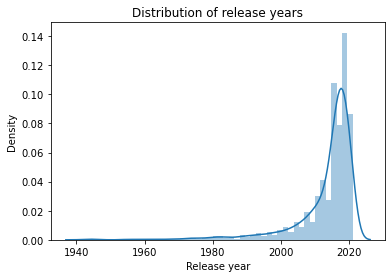

In [41]:
ax = sns.distplot(df_netflix['release_year'])
ax.set(xlabel = 'Release year')
ax.set(title = 'Distribution of release years')